# Module 6. 設定值處理

## 6-1 : 什麼是 Threshold 二值化處理
### Thresh `門檻, 閾`
> threshold 是`門檻值`的意思，OpenCV 提供的 threshold 工具包裡面有影像門檻值的功能，當畫素值高於門檻值時，我們給這個畫素賦予一個新值（可能是白色），否則我們給它賦予另一種顏色（也許是黑色）。這個函式就是 cv2.threshold()

> 圖像的二值化就是將圖像上的圖元點的`灰度值`設置為 0 或 255，這樣將使整個圖像呈現出明顯的黑白效果。在數位影像處理中，二值圖像佔有非常重要的地位，圖像的二值化使圖像中資料量大為減少，從而能凸顯出`目標的輪廓`。

><img src="../assets/images/basic/thresh4.jpg"  style='width:100%'>

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=np.random.randint(100, 150, size=[5, 5], dtype=np.uint8)
print(f'img : \n{img}\n')

thd, t1 = cv2.threshold(img, 125, 245, cv2.THRESH_BINARY)   # 大於125的設為245
print(f'thd : {thd}\n\n'
      f't1 :\n{t1}')



img : 
[[133 145 134 111 130]
 [107 137 100 113 117]
 [114 138 117 133 110]
 [105 142 112 107 125]
 [114 149 101 136 129]]

thd : 125.0

t1 :
[[245 245 245   0 245]
 [  0 245   0   0   0]
 [  0 245   0 245   0]
 [  0 245   0   0   0]
 [  0 245   0 245 245]]


ret : 127.0


-1

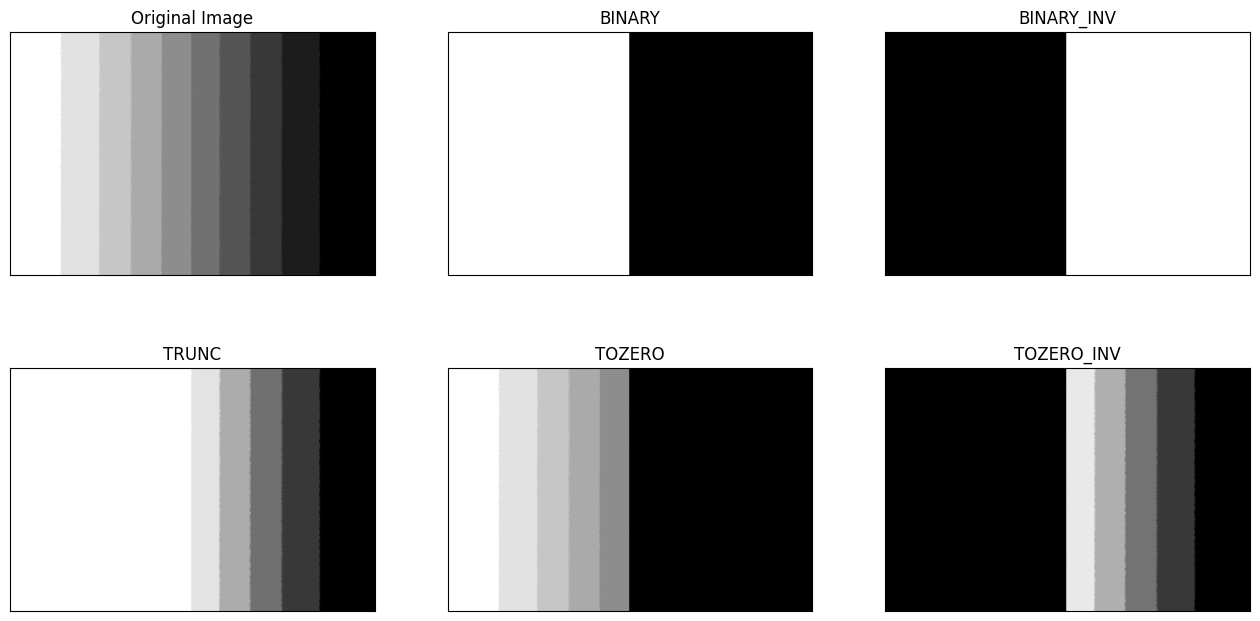

In [9]:
import cv2
import numpy as np

img = cv2.resize(cv2.imread('../assets/images/basic/thresh.jpg', 0), (300,200))
# img = cv2.resize(cv2.imread('../assets/images/basic/lenaColor.png', 0),(400, 300))
    
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # 1=255, 0=0
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)   # 1=127 Thresh, 0=value
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)  # 1=value,  0=0
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
print(f'ret : {ret}')

plt.figure(figsize=(16, 8))

for idx, (t, i) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, idx + 1),  plt.imshow(i, 'gray')
    plt.setp(plt.title(t), color='k')
    plt.xticks([]), plt.yticks([])

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

## 6-2: 自我調節設定
### threshold adaptive ``局部`` 自我調節設定

cv.adaptiveThreshold(	src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]	) ->	dst




> 自我調整門檻,閾值二值化函數根據圖片一小塊區域的值來計算對應區域的門檻, 閾值，從而得到也許更為合適的圖片。
> * thresh_type ： 門檻, 閾值的計算方法，包含以下2種類型：
>> * cv2.ADAPTIVE_THRESH_MEAN_C : 鄰域`面積的平均值`
>> * cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 高斯窗口的鄰域值的`加權和`
> * Block Size ： 圖片中分塊的大小
> * C ：閾值計算方法中的常數項src−類的對像表示源（輸入）圖像。offset ( thresh - c )

In [13]:
import cv2
import numpy as np

img=np.random.randint(0, 255, size=[5, 5], dtype=np.uint8)

print(f'img :\n{img}\n')

t1, thd = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)   # try 127 → 125
print(f'threshHold : {t1}\n\n'
      f'thd :\n{thd}\n')

Ad_thd_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 3)
print(f'Ad_thd_mean :\n{Ad_thd_mean}\n')

Ad_thd_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 3)
print(f'Ad_thd_gauss :\n{Ad_thd_mean}')



img :
[[ 69 183  76  43  45]
 [ 29  50 107  27  75]
 [101 253  90 236  42]
 [ 73  48 134 225 129]
 [251 174 140 126 254]]

threshHold : 127.0

thd :
[[  0 255   0   0   0]
 [  0   0   0   0   0]
 [  0 255   0 255   0]
 [  0   0 255 255 255]
 [255 255 255   0 255]]

Ad_thd_mean :
[[  0 255   0   0   0]
 [  0   0   0   0 255]
 [255 255   0 255   0]
 [  0   0   0 255   0]
 [255 255   0   0 255]]

Ad_thd_gauss :
[[  0 255   0   0   0]
 [  0   0   0   0 255]
 [255 255   0 255   0]
 [  0   0   0 255   0]
 [255 255   0   0 255]]


In [1]:
import numpy as np
import cv2

image = cv2.imread('../assets/images/basic/mybaby.jpg', 0)
cv2.imshow('Original', image)

ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)  # 1 : 255, 0 : 0
cv2.imshow('Thresh hold 127, 255', thresh)

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 5)
cv2.imshow('adaptive / Mean Thresh', thresh)

thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 5)
cv2.imshow('adaptive /  Gaussian Thresh', thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

<div style="page-break-after: always"></div>

## 6-3 : otsu 處理
> #### Otsu 演算法假設這副圖片由前景色和背景色組成，通過統計學方法（`最大類間方差`）選取一個閾值，將前景和背景盡可能分開。也就是說這還是一個全域門檻, 閾值問題。
> ### threshold otsu : 是一種自動門檻值決定法則
>><img src="../assets/images/basic/otsu.png"  style='width:90%'>

### Otsu 過程 ：
> * 計算圖像長條圖
> * 設定一門檻, 閾值，把長條圖強度大於門檻, 閾值的圖元分成一組，把小於閾值的圖元分成另外一組
> * 分別計算兩組內的偏移數，``並把偏移數相加``
> * 把 0 ~ 255 依照順序多為閾值，重複 1-3 的步驟，``直到得到最大偏移數``，其所對應的值即為結果門檻, 閾值。

> https://www.cnblogs.com/gezhuangzhuang/p/10295181.html

In [2]:
import cv2
import numpy as np

img=np.random.randint(0, 256, size=[5, 5], dtype=np.uint8)
print(f'img : \n{img}\n')

th2, img2 = cv2.threshold(img, 0, 255,  cv2.THRESH_OTSU)  # type
print(f'THRESH_OTSU th2 : {th2}\n\n'
      f'img2 :\n{img2}')

img : 
[[154  21 254 218  30]
 [228 186  36 221 110]
 [ 99  90  17 230  87]
 [102  20  96 125 168]
 [225 236   1  50 233]]

THRESH_OTSU th2 : 125.0

img2 :
[[255   0 255 255   0]
 [255 255   0 255   0]
 [  0   0   0 255   0]
 [  0   0   0   0 255]
 [255 255   0   0 255]]


Otsu's threshold : 191.0


-1

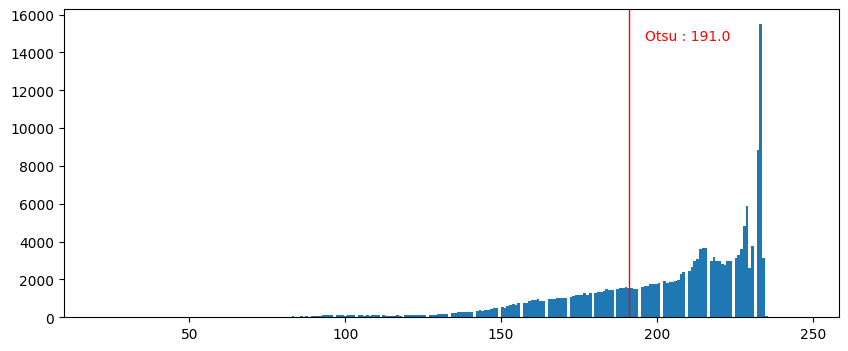

In [3]:
# using cv2 module
import numpy as np
from matplotlib import pyplot as plt
import cv2

image = cv2.imread('../assets/images/basic/mybaby.jpg', 0)
# image = cv2.imread('../assets/images/basic/lenaColor.png', 0)

cv2.imshow('original', image)

ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)  # 1 : 255, 0 : 0
cv2.imshow('Thresh hold : 127', thresh)

# Otsu threshold
th2, img2 = cv2.threshold(image, 0, 255,  cv2.THRESH_OTSU)
print(f"Otsu's threshold : {th2}")
cv2.imshow(f'Otsu : {th2}', img2)

plt.figure(figsize=(10,4))
plt.hist(image.flatten(), 256)   # 畫直方圖
plt.axvline(x=th2, color='r', lw=1)
# print(plt.ylim()[1])
plt.text(th2+5, plt.ylim()[1]*.9, f'Otsu : {th2}', fontsize=10, color='r')

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)